In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [8]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [9]:
import pandas as pd

In [10]:
df_messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                         names=['label', 'message'])

In [11]:
df_messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df_messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df_messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
df_messages['length'] = df_messages['message'].apply(len)
df_messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

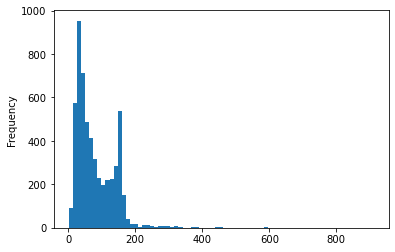

In [18]:
df_messages['length'].plot.hist(bins=75)

In [20]:
df_messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [21]:
df_messages[df_messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

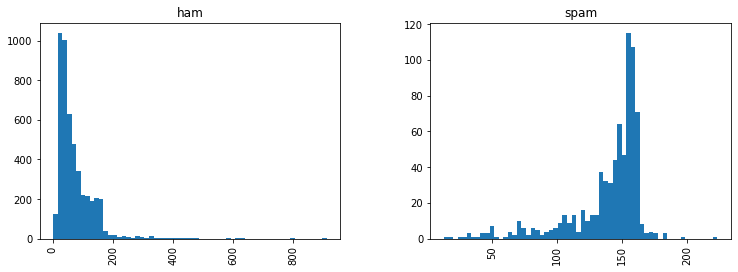

In [22]:
df_messages.hist(column='length', by = 'label', bins=60, figsize=(12,4))

In [23]:
import string

In [34]:
mess = 'Sample message! Notice: it is punctuation'

In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
nopunc = [c for c in mess if c not in string.punctuation]

In [37]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'i',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [38]:
from nltk.corpus import stopwords

In [39]:
#stopwords.words('english')

nopunc = ''.join(nopunc)

In [40]:
nopunc

'Sample message Notice it is punctuation'

In [41]:
x=['a', 'b', 'c', 'd']
''.join(x)

'abcd'

In [42]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'is', 'punctuation']

In [43]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [46]:
def text_process(mess):
    """
    1. remove punc
    2. remove stopwords
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [47]:
message.head()

AttributeError: 'str' object has no attribute 'head'

In [48]:
df_messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
df_messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df_messages['message'])

In [53]:
print(len(bow_transformer.vocabulary_))

11425


In [54]:
mess4 = df_messages['message'][3]

In [55]:
print(mess4)

U dun say so early hor... U c already then say...


In [56]:
bow4 = bow_transformer.transform([mess4])

In [57]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [58]:
print(bow4.shape)

(1, 11425)


In [59]:
bow_transformer.get_feature_names()[4068]

'U'

In [60]:
messages_bow = bow_transformer.transform(df_messages['message'])

In [61]:
print('Shape of Sparse Matrix : ', messages_bow.shape)

Shape of Sparse Matrix :  (5572, 11425)


In [62]:
messages_bow.nnz

50548

In [66]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [69]:
tfidf4 = tfidf_transformer.transform(bow4)

In [70]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [71]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [72]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, df_messages['label'])

In [76]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [77]:
df_messages['label'][3]

'ham'

In [78]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [79]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
msg_train, msg_test, label_train, label_test = train_test_split(df_messages['message'], df_messages['label'], test_size=0.3)

In [82]:
from sklearn.pipeline import Pipeline

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [92]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [84]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbd90dcce50>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [89]:
predictions = pipeline.predict(msg_test)

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1444
        spam       1.00      0.68      0.81       228

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

